# Market Basket Analysis

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
mpl.rcParams['lines.linewidth'] = 2
import warnings
warnings.filterwarnings(action='ignore') 


%matplotlib inline

In [2]:
df=pd.read_csv('total_dataset.csv')
df.shape

(13378265, 26)

In [3]:
test=df[:50000]

In [4]:
test['PD_BUY_AM']=test['PD_BUY_AM'].apply(lambda x: x.replace(',',''))
test['PD_BUY_AM']=test['PD_BUY_AM'].apply(lambda x: x.replace('nan','0'))
test['PD_BUY_AM']=test['PD_BUY_AM'].astype('int')
test['Sales']=test['PD_BUY_AM']*test['PD_BUY_CT']
test['SESS_DT']=test['SESS_DT'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d'))
test['SESS_DT_period'] = test.SESS_DT.apply(lambda x: x[:7])


## 일별 트렌드 확인

일별로 고객들의 접속기기/도시/상품/성별/나이의 특성이 어떻게 변하는지 파악합니다.

1. 대체로 모바일-데스크탑-태블릿 순이며, 각각의 기기에서도 일별로 시계열적인 흐름이 있습니다.
2. 대체로 서울-경기도-인천 순이며, 일별로 시계열적인 흐름이 있습니다.
3. 대체로 남자보다 여자의 접속이 많습니다.
4. 대체로 연령은 30-40대입니다.

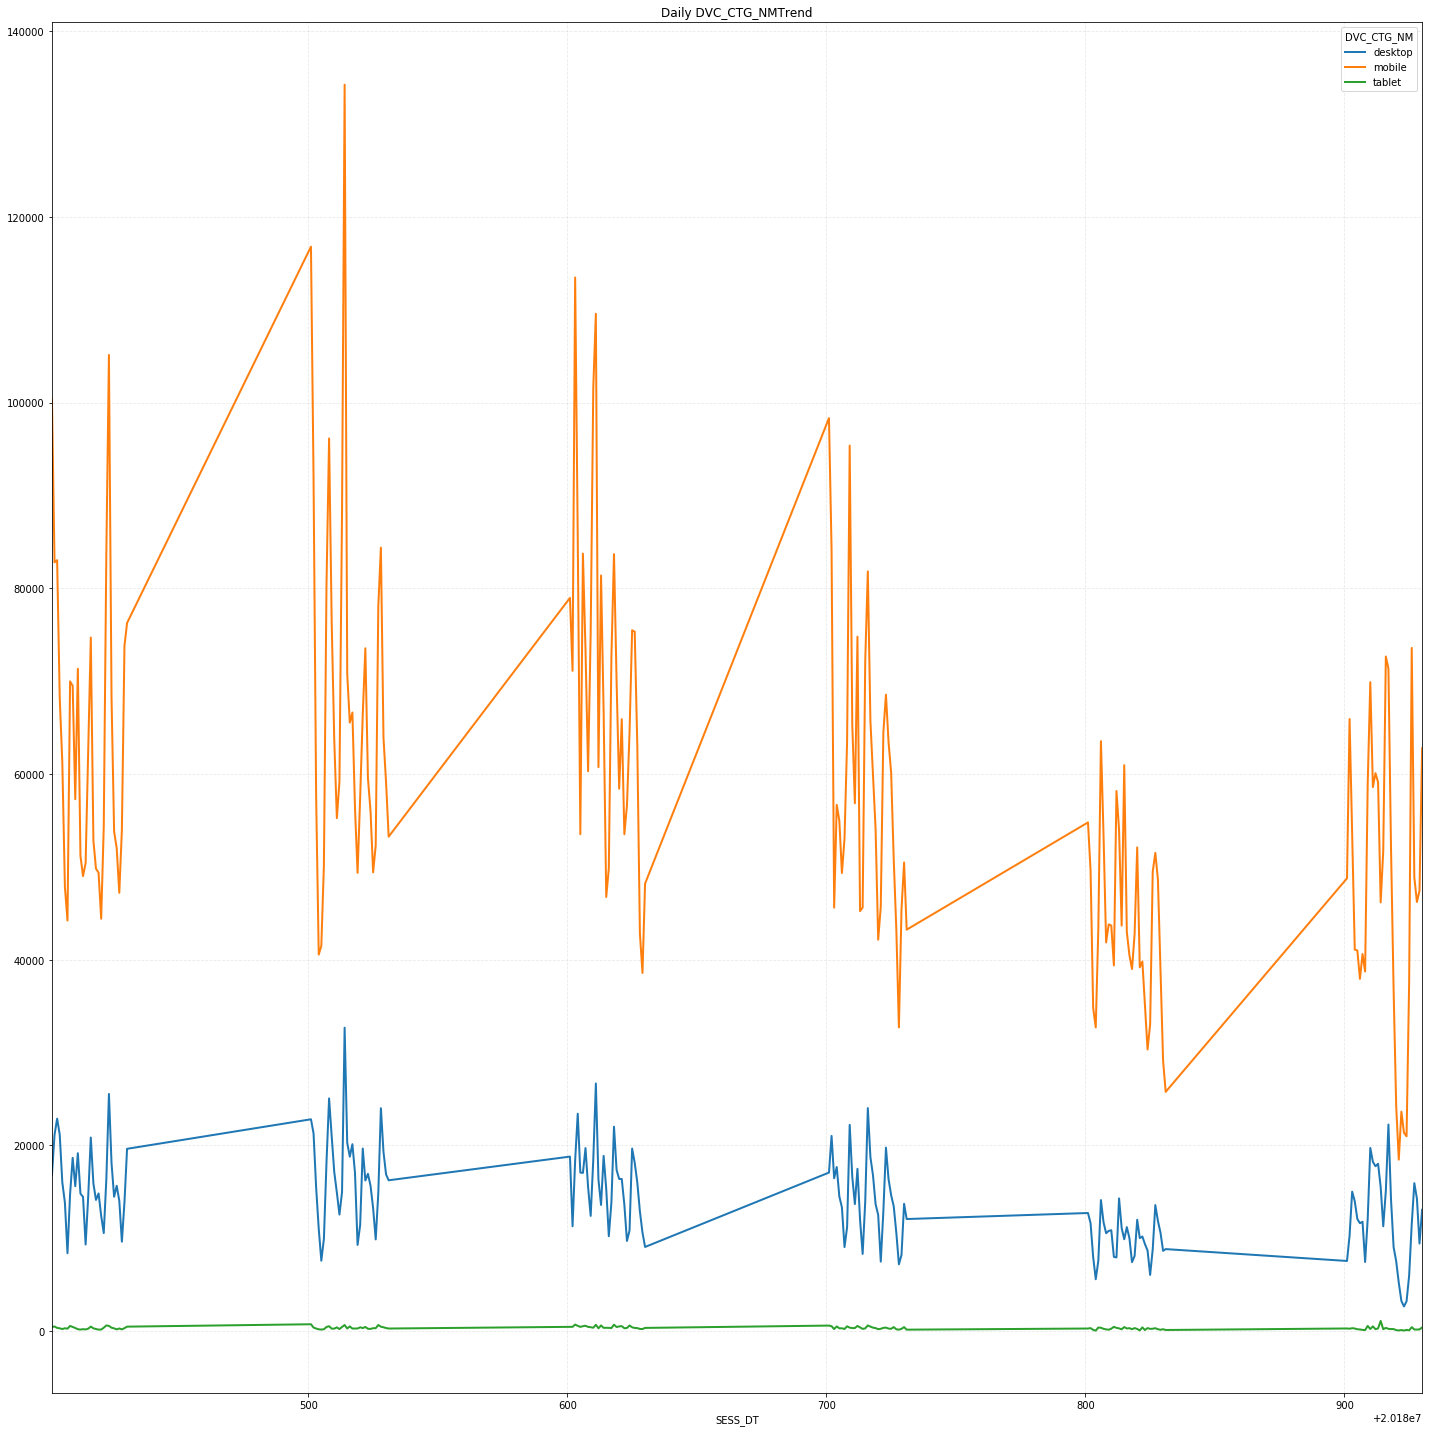

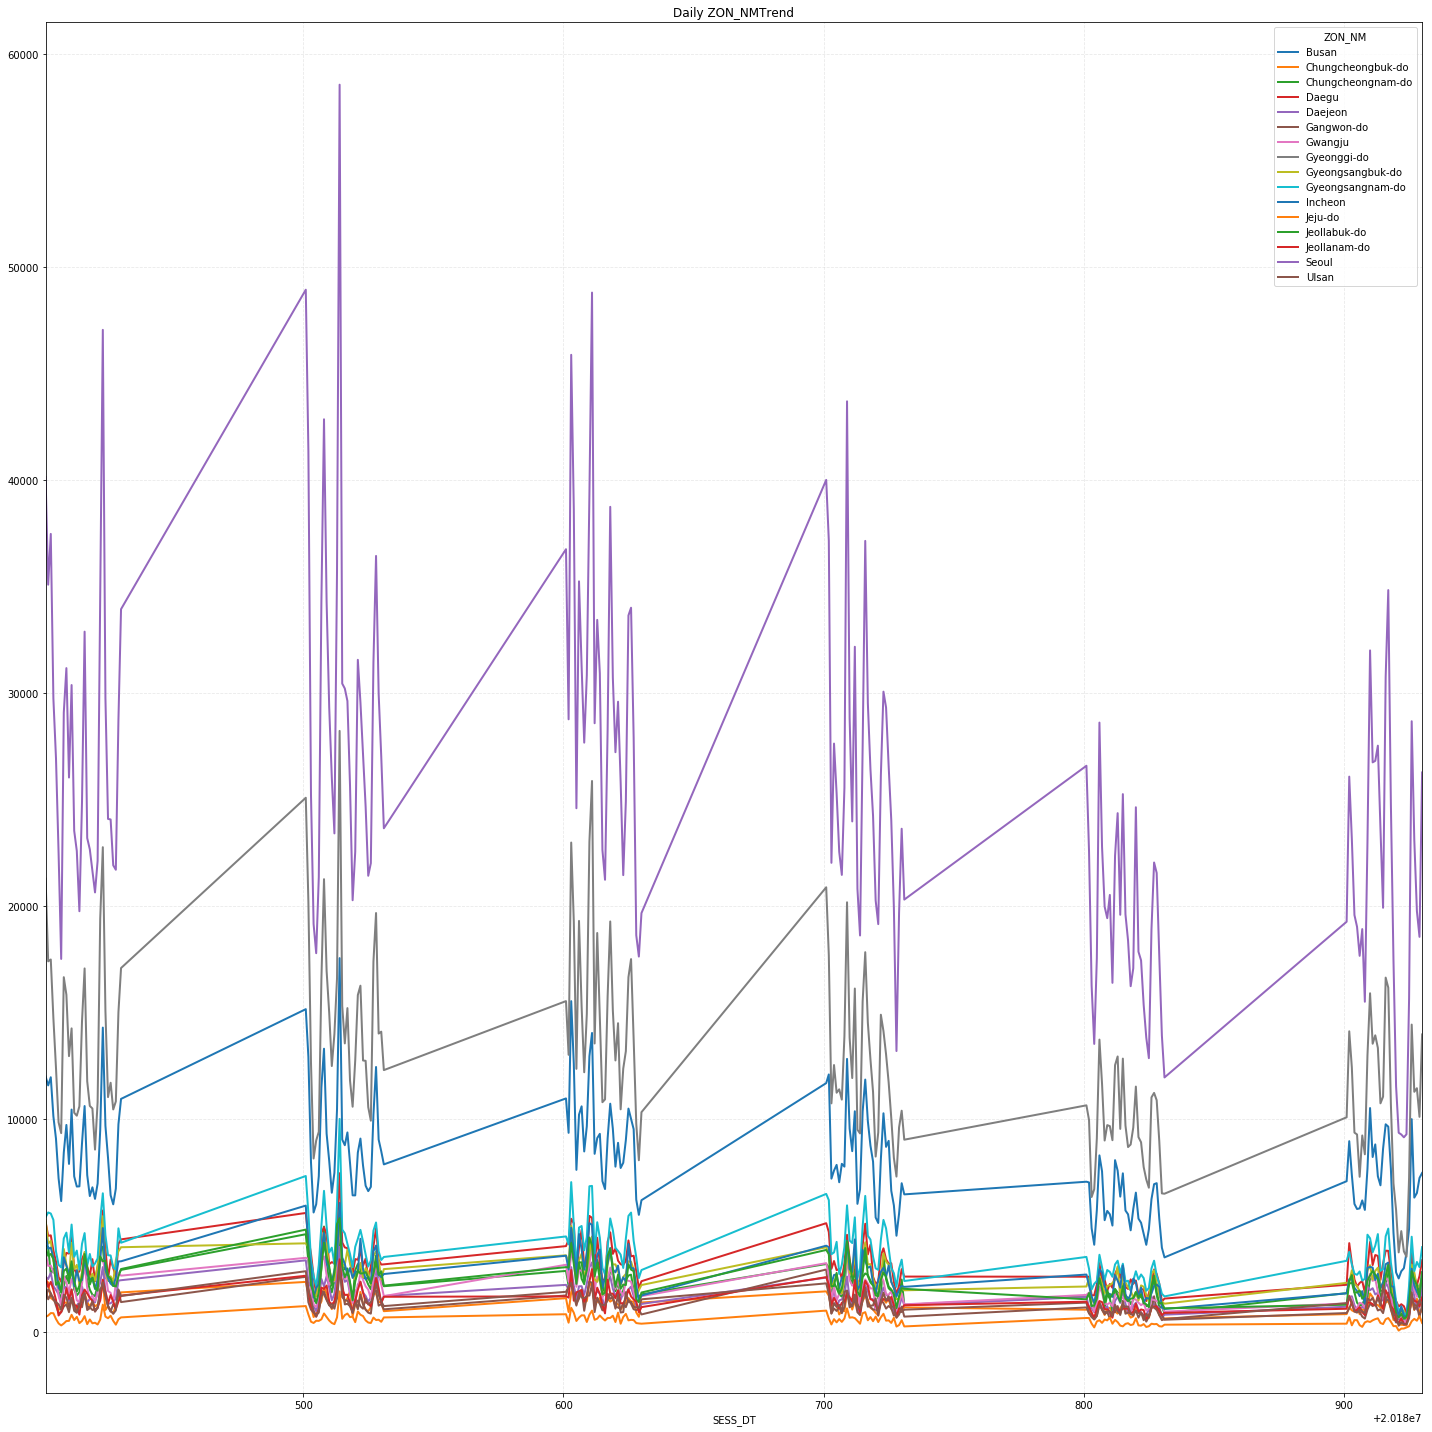

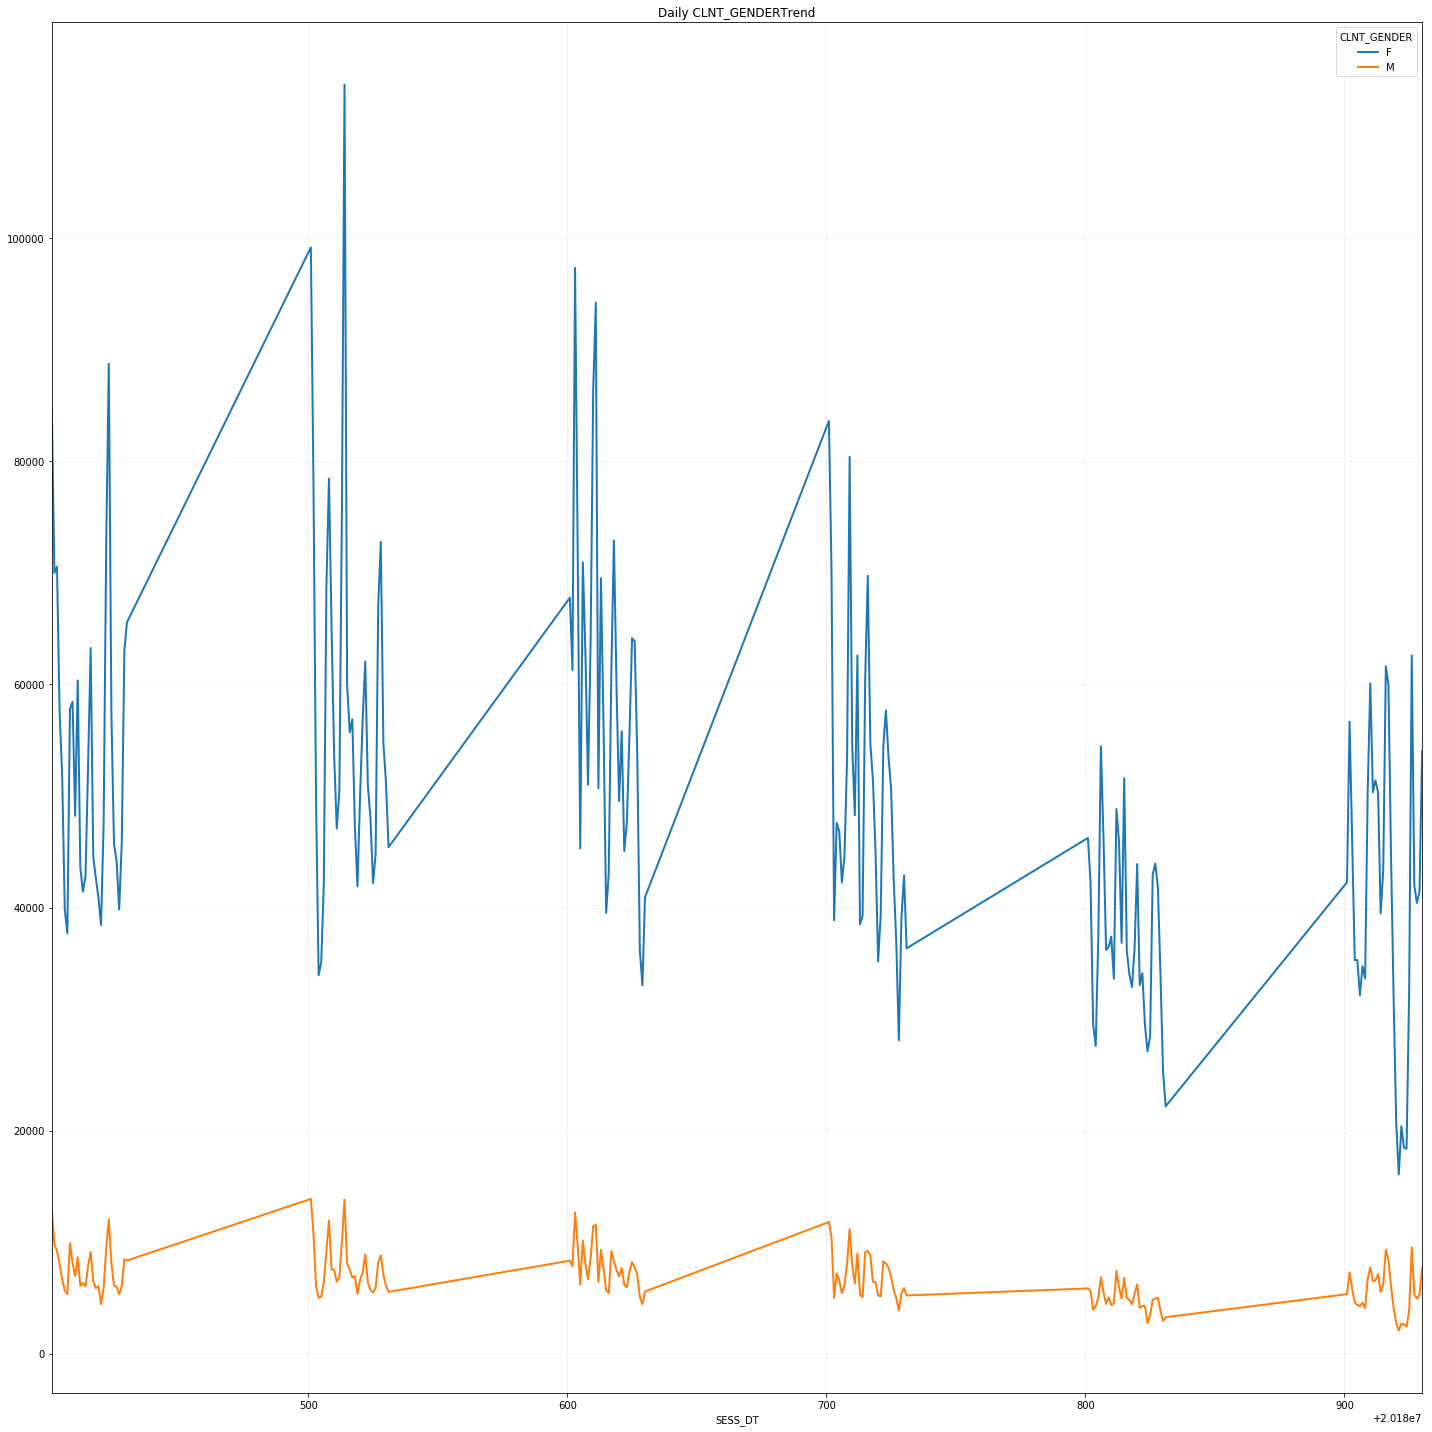

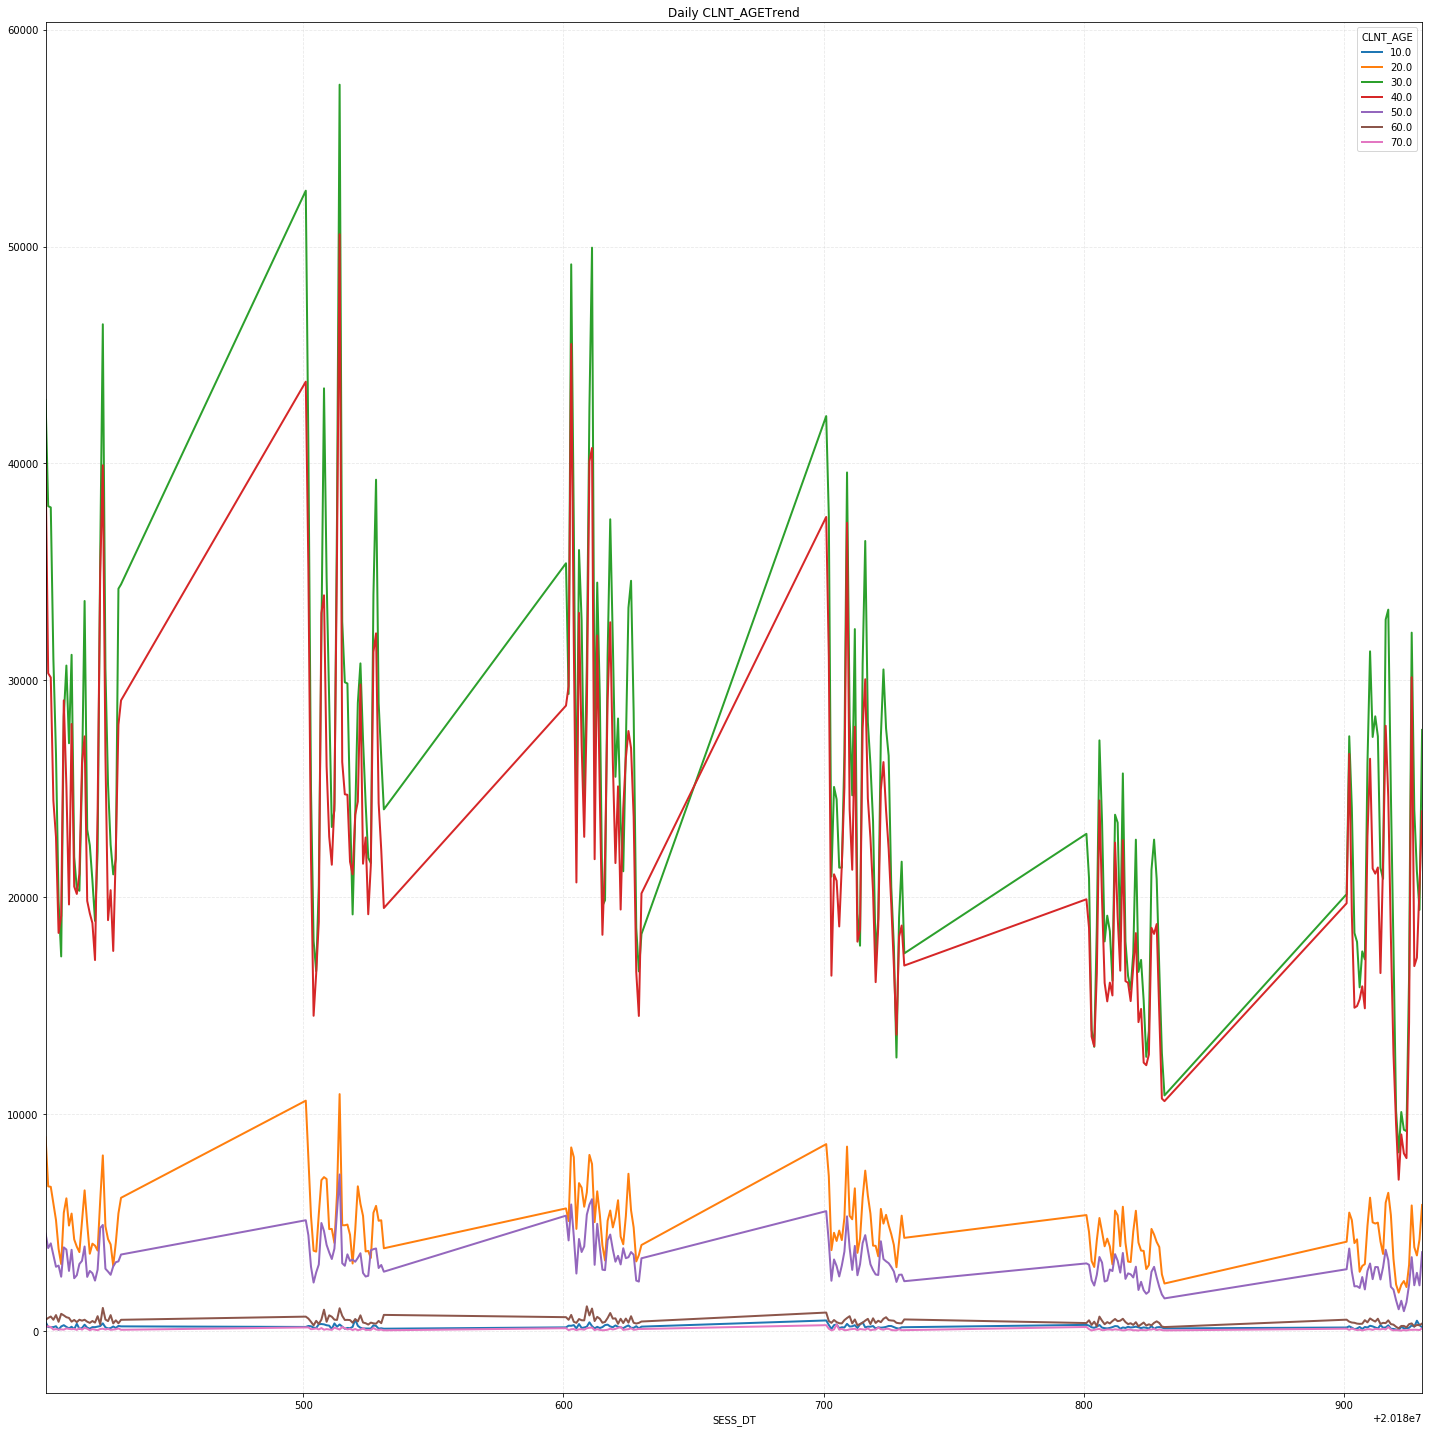

In [5]:
# daily trend by extention
cols=['DVC_CTG_NM','ZON_NM','CLNT_GENDER','CLNT_AGE']
for i in cols:
    df.groupby(['SESS_DT', i]).size().unstack().dropna(axis=1).plot(figsize=(20,20));

    plt.title("Daily "+i+"Trend")
    plt.grid(color = 'lightgrey', alpha=0.5, linestyle='--') # alpha는 투명도
    plt.tight_layout()

# 장바구니분석
- 연관규칙분석이란 어떤 두 아이템 집합이 번번히 발생하는가를 알려주는 일련의 규칙들을 생성하는 알고리즘입니다. 
- 경영학에서 장바구니 분석(Market Basket Analysis)으로 널리 알려져 있는 방법론입니다. 
- 소비자들의 구매이력 데이터를 토대로 “X 아이템을 구매하는 고객들은 Y 아이템 역시 구매할 가능성이 높다”는 식의 결론을 내는 알고리즘입니다. 
- 어떤 상품을 고르면 그 상품을 구매한 사람들이 선택한 다른 상품을 제안하는 컨텐츠 기반 추천의 기본이 되는 방법론입니다.

In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [7]:
# 고객별 총 구매 상품군을 알아보기 위해 데이터를 구성합니다.
basket=test.groupby('CLNT_ID_y')['CLAC1_NM'].apply(list)

In [8]:
# 고객들의 총 구매한 상품군 중 고객별로 구매한 상품군과 구매하지 않은 상품군을 희소행렬로 나타내어 분석을 진행합니다.
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,가구,건강식품,계절가전,과일,구기/필드스포츠,남성의류,냉동식품,냉장/세탁가전,냉장식품,모바일,문구/사무용품,상품권,생활/주방가전,세제/위생,속옷/양말/홈웨어,스포츠패션,시즌스포츠,식기/조리기구,아웃도어/레저,여성의류,영상/음향가전,완구,원예/애완,유아동의류,음료,인테리어/조명,자동차용품,주방잡화,청소/세탁/욕실용품,축산물,출산/육아용품,침구/수예,컴퓨터,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


## 아이템별 지지도
- 지지도란 하나일 경우 전체 제품 중 a를 구매할 확률, 2개 이상일 경우 전제 제품 중 a,b 혹은 그 이상이 동시에 구매할 확률입니다.

In [9]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets 

,support,itemsets
0,0.026260,(가구)
1,0.086231,(건강식품)
2,0.019872,(과일)
3,0.024131,(구기/필드스포츠)
4,0.204400,(남성의류)
5,0.010646,(냉동식품)
6,0.015969,(모바일)
7,0.024485,(문구/사무용품)
8,0.029454,(생활/주방가전)
9,0.035841,(세제/위생)


## 각 상품군에 따른 연관관계 결과
- antecedents/consequents는 선후관계입니다. 즉 건강식품을 구매한 고객은 화장품/뷰티케어를 구매할 확률이 높다 라는 결론을 얻을 수 있습니다.
- antecedent support는 선 관계의 상품을 전체 품목중 구매할 확률 
- consequent support는 후 관계의 상품을 전체 품목중 구매할 확률
- support는 전체 품목중 선.후관계의 상품을 모두 구매할 확률
- confidence는 선관계의 구매 횟수 중에 선.후관계의 상품을 모두 구매할 확률
- lift는 식은 복잡하지만 1보다 클 경우 양의 관계/1인 경우 독립적 관계/1보다 작을 경우 음의 관계를 확률적으로 증명할 수 있습니다.

In [10]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3) 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(가구),(화장품/뷰티케어),0.026260,0.304471,0.010291,0.391892,1.287123,0.002296,1.143758
1,(건강식품),(화장품/뷰티케어),0.086231,0.304471,0.027679,0.320988,1.054246,0.001424,1.024324
2,(구기/필드스포츠),(스포츠패션),0.024131,0.278211,0.013485,0.558824,2.008628,0.006771,1.636054
3,(남성의류),(스포츠패션),0.204400,0.278211,0.072037,0.352431,1.266772,0.015170,1.114612
4,(식기/조리기구),(남성의류),0.047551,0.204400,0.016678,0.350746,1.715977,0.006959,1.225406
5,(남성의류),(여성의류),0.204400,0.256565,0.075586,0.369792,1.441318,0.023144,1.179666
6,(침구/수예),(남성의류),0.050035,0.204400,0.018453,0.368794,1.804275,0.008226,1.260444
7,(남성의류),(패션잡화),0.204400,0.246984,0.065295,0.319444,1.293383,0.014811,1.106473
8,(문구/사무용품),(화장품/뷰티케어),0.024485,0.304471,0.013485,0.550725,1.808790,0.006030,1.548112
9,(생활/주방가전),(패션잡화),0.029454,0.246984,0.010291,0.349398,1.414659,0.003016,1.157414


In [11]:
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3) 


- 다음의 결과는 고객들이 상품을 구매할때의 맥주/기저귀를 같이 사는 것처럼 제품간의 연관성을 파악할 수 있습니다.
- top 순위를 보면
1. 1위는 주부들을 예상, 
2. 2위는 젊은 남성들을 예상, 
3. 4,5위는 주부들을 예상할 수 있겠습니다.
이 결과의 사용은 쿠폰이나 이벤트를 진행할 때 묶음 할인 및 1+1같은 두 상품을 사게끔 유발하는 전략이 가능합니다.